In [1]:
# import the necessary packages
#from imutils.video import VideoStream
from imutils.video import FPS
import numpy as np
import argparse
import imutils
import pickle
import time
import cv2
import os
from cv2_imshow import cv2_imshow
from align import AlignDlib
 

In [2]:
from model import create_model

Using TensorFlow backend.


In [3]:
print ('[INFO] loading face detector')
nn4_small_pretrained = create_model()
nn4_small_pretrained.load_weights('weights/nn4.small2.v1.h5')

print ('[INFO] loading emb face')
import pickle 
with open('database/x_vector.pkl', 'rb') as f:
    x_vector = pickle.load(f)
    
with open('database/x_label.pkl', 'rb') as f:
    x_label = pickle.load(f)
    
with open('database/x_name.pkl', 'rb') as f:
    x_name = pickle.load(f)

[INFO] loading face detector
[INFO] loading emb face


In [4]:
alignment = AlignDlib('models/landmarks.dat')
def align_image(img, box):
    return alignment.align(96, img, box,
                           landmarkIndices=AlignDlib.OUTER_EYES_AND_NOSE)

def get_boxs(img):
    return alignment.getAllFaceBoundingBoxes(img)

def img2vect(img):
    img = (img / 255.).astype(np.float32)
    img = np.expand_dims(img, axis=0)
    return nn4_small_pretrained.predict(img)[0]

def draw(img, text, box):
    startX = box.left()
    startY = box.top()
    endX = startX + box.width()
    endY = startY + box.height()
    cv2.rectangle(img, (startX, startY), (endX, endY),(0, 0, 255), 2)
    cv2.putText(img, text, (startX, startY), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)
    return img

In [5]:
print ("[INFO] starting video stream...")
vs = cv2.VideoCapture(-1)
time.sleep(2.0)

# start the FPS throughput estimator
fps = FPS().start()

# loop over frames from the video file stream
while True:
    # grab the frame from the threaded video stream
    ret, frame = vs.read()
    
    boxs = get_boxs(frame)
       
    if boxs is not None: 
        for box in boxs:
            img = align_image(frame, box)
            yv = img2vect(img)
            
            minimum = 999
            person = "unknow"
            acc = 1
            for xv, xn in zip(x_vector, x_name):
                dist = np.linalg.norm(xv - yv)
                if dist > 0.7: continue
                if dist < minimum: 
                    minimum = dist
                    person = xn
                    acc = (0.7 - dist)/0.7
            
            draw(frame, person + ' ' + str(acc), box)
        

    cv2.imshow("Frame", frame)
    key = cv2.waitKey(1) & 0xFF
    fps.update()
    if key == ord("q"):
        break
fps.stop()
cv2.destroyAllWindows()
vs.release()

[INFO] starting video stream...


AssertionError: 

In [ ]:
vs.release()

In [35]:
frame1 = frame
box1 = get_boxs(frame)[0]

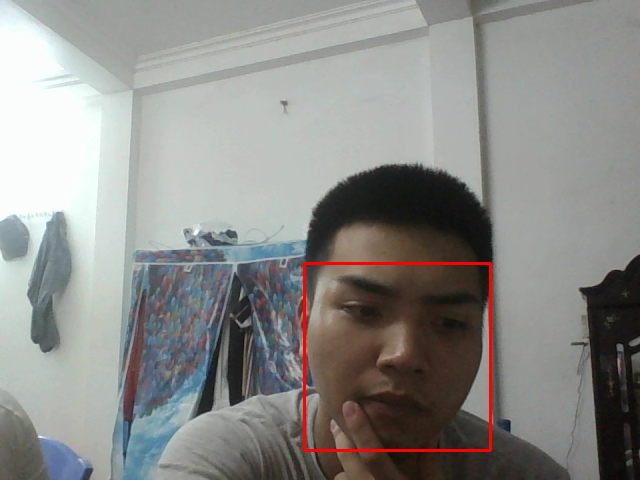

In [36]:
cv2_imshow(frame1)

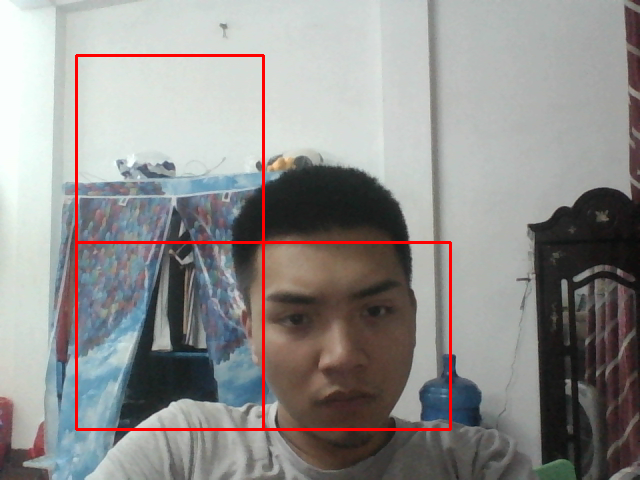

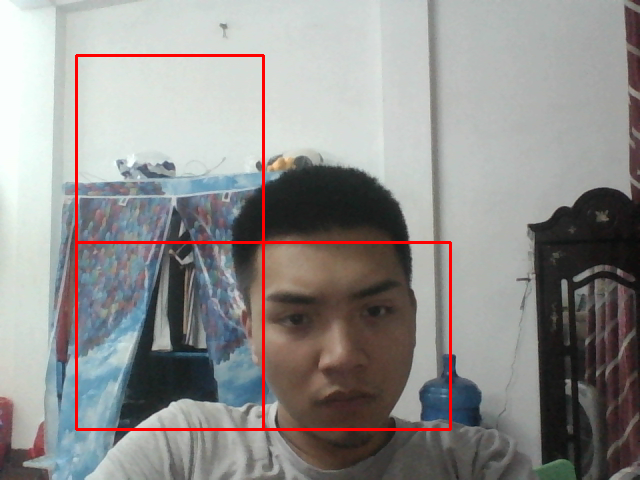

In [14]:
frame = frame1
box = box1
cv2_imshow(frame)
box = get_box(frame)
startX = box.left()
startY = box.top()
endX = startX - box.width()
endY = startY - box.height()
#startY = box[1]
cv2.rectangle(frame, (startY, startX), (endY, endX),(0, 0, 255), 2)
cv2_imshow(frame)